In [ ]:
import pandas as pd
df = pd.read_csv('loan_data (1).csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['credit.policy', 'installment', 'log.annual.inc']]
y = df['int.rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [-2.18569575e-02  4.39853731e-05 -3.49724348e-03]
Intercept: 0.1643842503955601
Mean Squared Error: 0.0005929803855791124
R-squared: 0.16669264777481485


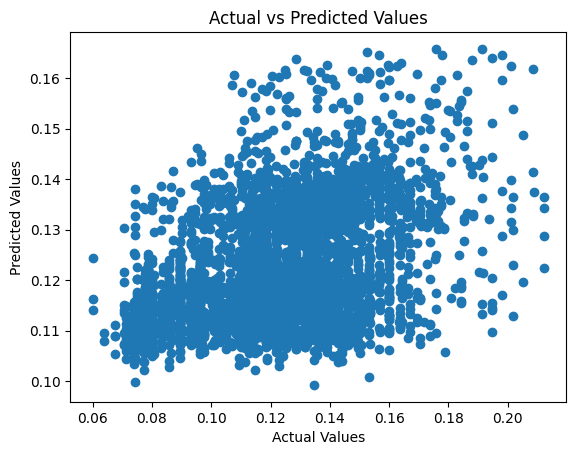

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Accuracy: 0.837508698677801
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874

Confusion Matrix:
 [[2407    1]
 [ 466    0]]


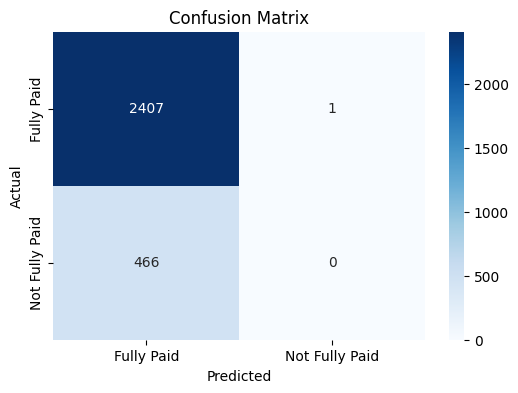

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Selecting relevant features and target variable
X = df[['credit.policy', 'int.rate', 'installment']]
y = df['not.fully.paid']  # Target variable (0: Fully Paid, 1: Not Fully Paid)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Fully Paid", "Not Fully Paid"], yticklabels=["Fully Paid", "Not Fully Paid"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("loan_data (1).csv")

# Convert categorical feature ('purpose') into numerical using one-hot encoding
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Select relevant features (modify as per requirement)
features = ['credit.policy', 'int.rate', 'installment']
X = df[features].values
y = df['not.fully.paid'].values  # Target column (binary classification)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Single-Layer Perceptron Implementation
class SingleLayerPerceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.activation(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

# Train SLP Model
slp = SingleLayerPerceptron(input_size=X_train.shape[1], lr=0.01, epochs=100)
slp.train(X_train, y_train)

# Make Predictions
y_pred = [slp.predict(x) for x in X_test]

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.11%


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("loan_data (1).csv")

X = df[['credit.policy', 'installment', 'log.annual.inc']]
y = df['int.rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the labels for multi-class classification
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output neurons for 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8130 - loss: 0.5035 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.7447e-04 - val_accuracy: 1.0000 - val_loss: 5.3811e-04
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.5651e-04 - val_accuracy: 1.0000 - val_loss: 3.0248e-04
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.6334e-04 - val_accuracy: 1.0000 - val_loss: 1.9272e-04
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.7049e-04 - val_accuracy: 1.0000 - val_loss: 1.3256e-04
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.1960e-04 - val_accuracy: 1.0000 - val_loss: 9.6108e-05
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - lo

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('loan_data (1).csv')

df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

rf = RandomForestClassifier(n_estimators=100, random_state=0)  # You can adjust the number of trees (n_estimators)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest model accuracy: {acc:.2f}%")

Random Forest model accuracy: 84.55%


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('loan_data (1).csv')

df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Naive Bayes model accuracy: {acc:.2f}%")

Naive Bayes model accuracy: 82.52%


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('loan_data (1).csv')

df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Decision Tree model accuracy: {acc:.2f}%")

Decision Tree model accuracy: 74.74%


In [ ]:
#SVM
from sklearn.svm import SVC

df = pd.read_csv('loan_data (1).csv')

df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"SVM model accuracy: {acc:.2f}%")

In [ ]:
#MLP
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('loan_data (1).csv')

df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"MLP model accuracy: {acc:.2f}%")

MLP model accuracy: 65.29%


In [ ]:
#KNN where n = 5
from sklearn.neighbors import KNeighborsClassifier

df2 = pd.read_csv('loan_data (1).csv')

df2 = pd.get_dummies(df2, columns=['purpose'], drop_first=True)

X = df2.drop('not.fully.paid', axis=1)
y = df2['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

knn = KNeighborsClassifier(n_neighbors=5)  # n = 5
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"KNN model accuracy: {acc:.2f}%")

KNN model accuracy: 82.67%


In [ ]:
from xgboost import XGBClassifier

df = pd.read_csv('loan_data (1).csv')

df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Boosting Accuracy: {acc:.1f}%")

Boosting Accuracy: 84.7%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('loan_data (1).csv')

df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(kernel='linear', probability=True)),
    ('dt', DecisionTreeClassifier(max_depth=3))
]

meta_model = LogisticRegression()

model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Stacking Accuracy: {acc:.1f}%")

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing
df = df.copy()
df = df.dropna()  # Remove missing values

# Encode categorical variable
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])

# Features and targets
X = df.drop(columns=['installment', 'not.fully.paid'])
y_linear = df['installment']  # Target for Linear Regression
y_logistic = df['not.fully.paid']  # Target for Logistic Regression

# Normalize features
X = (X - X.mean()) / X.std()
X.insert(0, 'bias', 1)  # Add bias term

# Convert to numpy arrays
X = X.to_numpy()
y_linear = y_linear.to_numpy().reshape(-1, 1)
y_logistic = y_logistic.to_numpy().reshape(-1, 1)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_linear, y_test_linear = train_test_split(X, y_linear, test_size=0.2, random_state=42)
X_train, X_test, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

# Linear Regression from Scratch
def linear_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(epochs):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= lr * gradient
    return theta

def predict_linear(X, theta):
    return X.dot(theta)

# Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for _ in range(epochs):
        predictions = sigmoid(X.dot(theta))
        error = predictions - y
        gradient = X.T.dot(error) / m
        theta -= lr * gradient
    return theta

def predict_logistic(X, theta):
    return sigmoid(X.dot(theta)) >= 0.5

# Train models
theta_linear = linear_regression(X_train, y_train_linear)
theta_logistic = logistic_regression(X_train, y_train_logistic)

# Predictions
preds_linear = predict_linear(X_test, theta_linear)
preds_logistic = predict_logistic(X_test, theta_logistic)

# Evaluate models
from sklearn.metrics import mean_squared_error, accuracy_score
mse = mean_squared_error(y_test_linear, preds_linear)
accuracy = accuracy_score(y_test_logistic, preds_logistic)

print("Linear Regression MSE:", mse)
print("Logistic Regression Accuracy:", accuracy)